<a href="https://colab.research.google.com/github/plopezmp/AmI/blob/main/AmI_NoSupervisado_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Referencias



*   Géron, Aurélien. *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems*. O'Reilly Media, 2019.
*  VanderPlas, Jake. *Python data science handbook: Essential tools for working with data.* " O'Reilly Media, Inc.", 2016. El ejemplo del algoritmo K-Means de notebook procede de este libro.
*   Scikit-klearn documentation on Clustering. [online: https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans






---

1. [Introducción a K-Means](#sec_kmeans)
2. [Algoritmo: ](#sec_em)
3. [Aplicación de K-Means a `dataset.digits`](#sec_kdigits)



---

Exploraremos **K-Means Clustering**, que es una técnica de clustering *no supervisada*.

Comenzaremos con la importación de librerías comunes.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# plt.style.use('seaborn')
import seaborn as sns; sns.set()

<a id='sec_kmeans'></a>
# Introducción a K-Means

K-Means es un algoritmo "*no supervisado*" de **clustering**, es decir, encontrar clústers en los datos basándose únicamente en los atributos de los datos (**no en las etiquetas**).

K-Means es un algoritmo relativamente fácil.
Computa **centros** de agrupamientos de datos, que representan una posición *media* dentro del agrupamiento.

Cada muestra o punto tendrá asignado un *centro*, que es el más cercano.

Veamos cómo funciona K-Means con un ejemplo.
No trazaremos los colores de los diferentes grupos Para remarcar el carácter no supervisado del algoritmo:

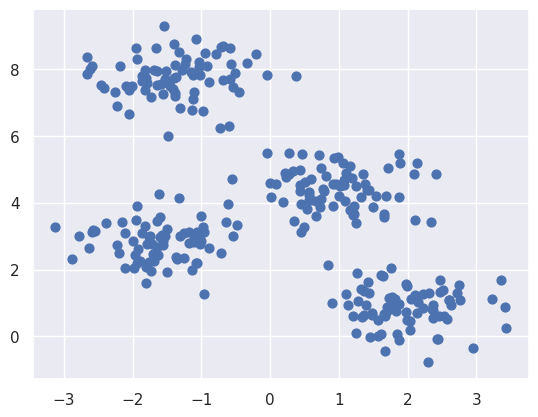

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,n_features=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=40);

A simple vista, podemos identificar 4 gupos de datos.


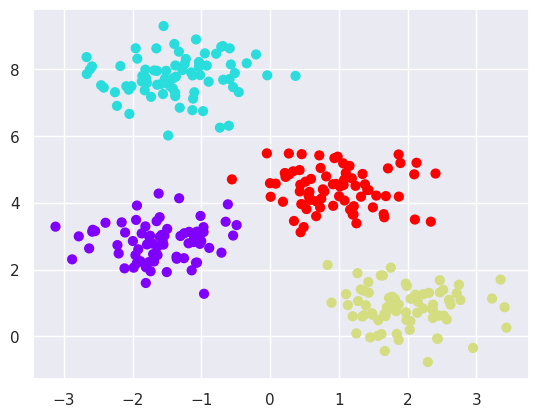

In [ ]:
# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X) # es la clase (0, 1, 2, 3)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=40, cmap='rainbow');

El algoritmo identifica los puntos de forma similiar a como haría una persona que viera la representación.

<a id='sec_em'></a>
# Algoritmo:

K-Means es un ejemplo de un algoritmo que utiliza un enfoque de *Expectation Maximizacion* para llegar a la solución.
Es un enfoque de dos pasos que funciona de la siguiente manera:

1. Adivina algunos centros de cluster
2. Repitir hasta que converja (no haya variación de la posición de los centros de cluster):
    1. **Cluster assignament step:** recorre todos los puntos y les asigna un *centroide*. Para ello, cada punto ve su distancia a uno de los centroides y se etiqueta con el que esté más cerca.
    2. **Move centroid step:** calcula el valor medio o el `mean` value de los puntos del cluster y *mueve* el centroide a ese punto.
  
   
Visualicemos este proceso:

**(Los ejemplos siguientes están en el libro del Van der Plas)**

In [ ]:
def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    from ipywidgets import interact
    from sklearn.metrics.pairwise import euclidean_distances
    from sklearn.datasets import make_blobs
    import warnings

    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')

        X, y = make_blobs(n_samples=300, centers=4,
                          random_state=0, cluster_std=0.60)

        def _kmeans_step(frame=0, n_clusters=4):
            rng = np.random.RandomState(2)
            labels = np.zeros(X.shape[0])
            centers = rng.randn(n_clusters, 2)

            nsteps = frame // 3

            for i in range(nsteps + 1):
                old_centers = centers
                if i < nsteps or frame % 3 > 0:
                    dist = euclidean_distances(X, centers)
                    labels = dist.argmin(1)

                if i < nsteps or frame % 3 > 1:
                    centers = np.array([X[labels == j].mean(0)
                                        for j in range(n_clusters)])
                    nans = np.isnan(centers)
                    centers[nans] = old_centers[nans]


            # plot the data and cluster centers
            plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow',
                        vmin=0, vmax=n_clusters - 1);
            plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',
                        c=np.arange(n_clusters),
                        s=200, cmap='rainbow')
            plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o',
                        c='black', s=50)

            # plot new centers if third frame
            if frame % 3 == 2:
                for i in range(n_clusters):
                    plt.annotate('', centers[i], old_centers[i],
                                 arrowprops=dict(arrowstyle='->', linewidth=1))
                plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                            c=np.arange(n_clusters),
                            s=200, cmap='rainbow')
                plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                            c='black', s=50)

            plt.xlim(-4, 4)
            plt.ylim(-2, 10)

            if frame % 3 == 1:
                plt.text(3.8, 9.5, "1. Mueve el punto a nuevo centroide",
                         ha='right', va='top', size=14)
            elif frame % 3 == 2:
                plt.text(3.8, 9.5, "2. Actualiza centroide a cluster",
                         ha='right', va='top', size=14)


    return interact(_kmeans_step, frame=(0, 50),
                    n_clusters=[min_clusters, max_clusters])

interactive(children=(IntSlider(value=0, description='frame', max=50), Dropdown(description='n_clusters', inde…

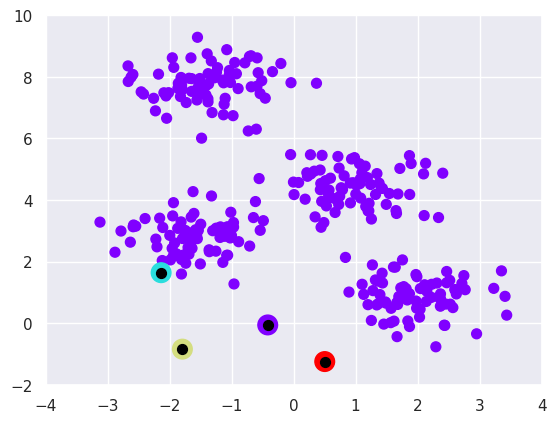

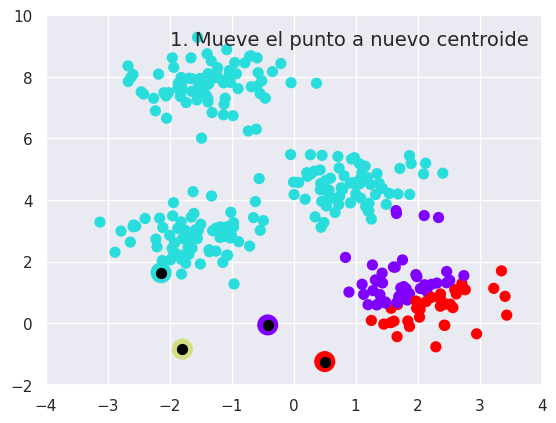

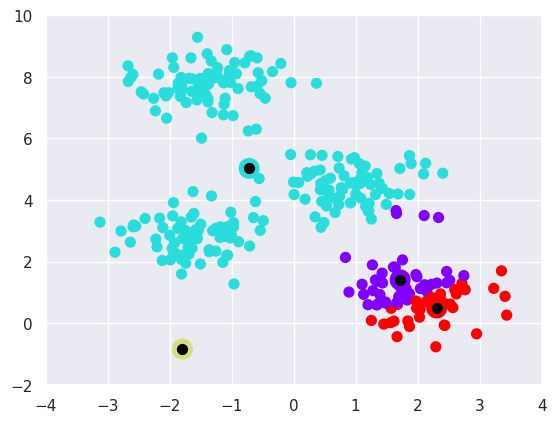

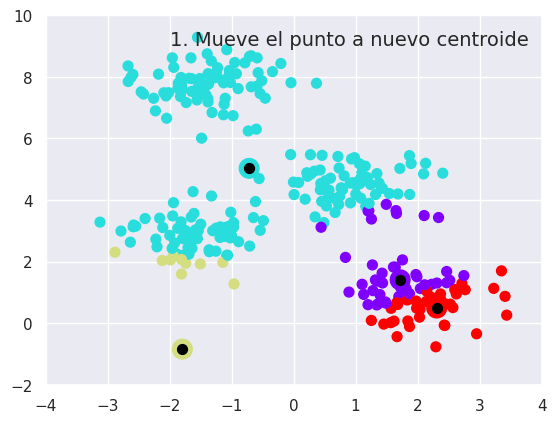

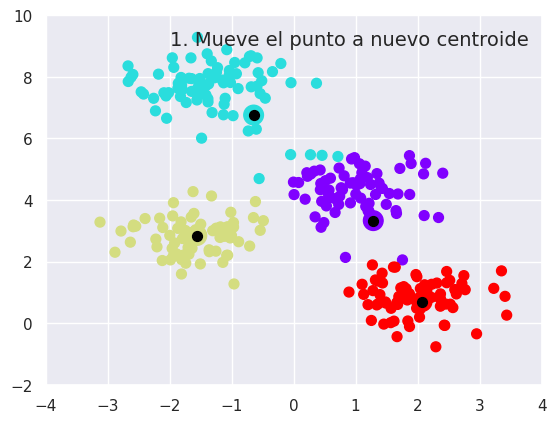

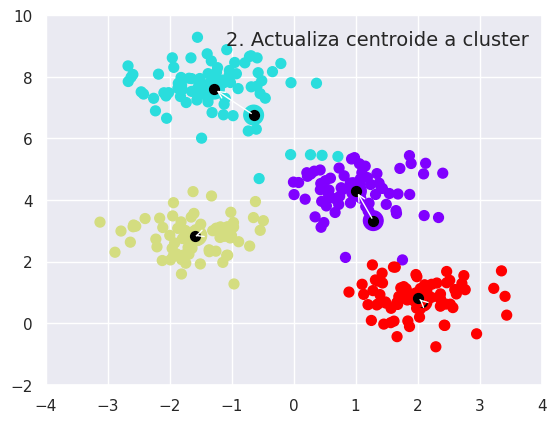

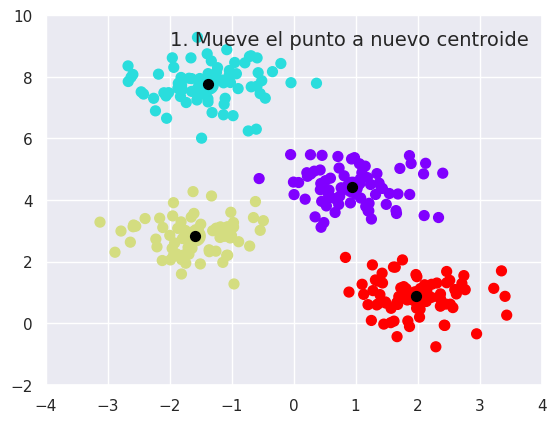

In [ ]:
plot_kmeans_interactive(1,4); # (min, max) número de centros

**Ventajas:**

- El algoritmo sencillo y se entiende bien.

- Sirve para entender otros métodos de *clustering*.

**Inconvenientes:**

- La convergencia de K-Means no está garantizada. Por esta razón `scikit-learn` repite el proceso varias veces iniciando con centros en posiciones aleatorias. El algoritmo finalmente se queda con el mejor resultado.

- Además, el número de clusters debemos fijarlo de antemano y, a veces, no es sencillo.

- Padece la denominada *maldición de la dimensionalidad* que consiste en que las distancias Euclídeas tienden a ser grandes cuando el número de dimensiones es grande. En estos casos, se puede reducir la dimensión aplicando `Principal Component Analysis (PCA)` antes de `K-means`.

<a id='sec_kdigits'></a>
# Aplicación de K-Means a `dataset.digits`

Para ver un ejemplo de aplicación real, volvamos a echar un vistazo a los datos de los dígitos. Aquí usaremos K-Means para agrupar automáticamente los datos en 64 dimensiones, y luego observaremos los centros de los clusters para ver qué ha encontrado el algoritmo.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits.data.shape

(1797, 64)

Esto es, son 1797 muestras de 64 features que representa intensidad de grises en imágenes de 8x8 pixeles.

In [ ]:
from sklearn.cluster import KMeans
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

Observamos 10 clusters de 64-dim. Cada centroide de cluster es un punto de 64 dimensiones también, y, podemos interpretarlos como el típico dígito en el cluster.

**Visualicemos los centroides** de dichos clusters:

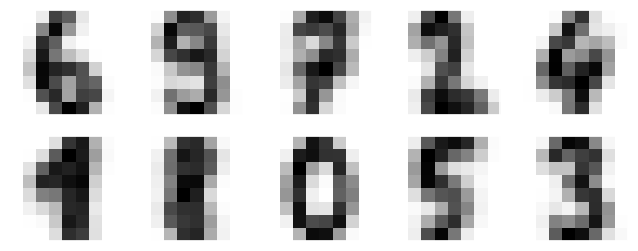

In [ ]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

El algoritmo ha identificado cada uno de los 10 dígitos (el 8 un poco peor...).

El algoritmo no sabe nada sobre la clase de cada clúster, y,  las etiquetas pueden estár permutadas en 0-9. Podemos solucionarlo poniendo a cada clúster su etiqueta correcta:

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Vamos a reducir la dimensionalidad con PCA para visualizar el dataset, cada punto coloreado con su etiqueta. Podemos representar los datos con las etiquetas de clúster verdaderas (derecha), y las etiquetas de clúster de K-mean (izquierda):

<ipython-input-11-50370f77cfa1>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),


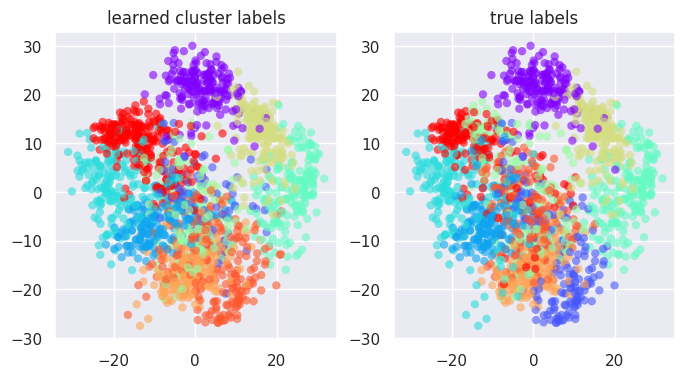

In [ ]:
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('true labels');

Veamos qué tan preciso es nuestro clasificador K-Means sin información de etiqueta:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7913188647746243

Un $\approx 80\%$ está bastante bien para un **estimador completamente no supervisado** que no sabe nada de las etiquetas de cada imagen de dígito.

Ahora comprobemos la matriz de confusión de nuestro modelo.

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   7   0   0 163   0   0   7   4   0]
 [  0   0   0   1   1 137   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   5   0 170   2   0]
 [  0   5   3   2   0   6   2   3 102  51]
 [  0  20   0   6   0   6   0   7   2 139]]


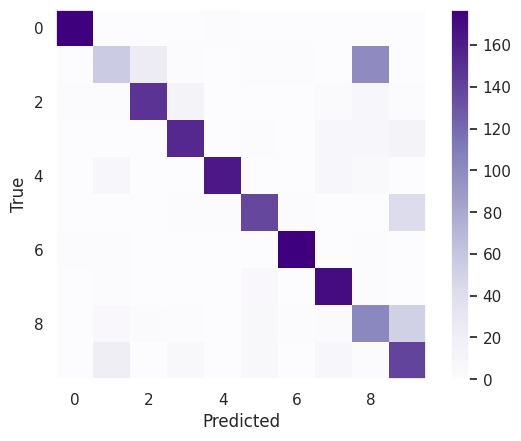

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Purples', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('True')
plt.xlabel('Predicted');

Por ejemplo, vemos que habría hasta 99 figuras con 1's que prediciría como '9's.

## K-Means para *Clusterizar* una imagen

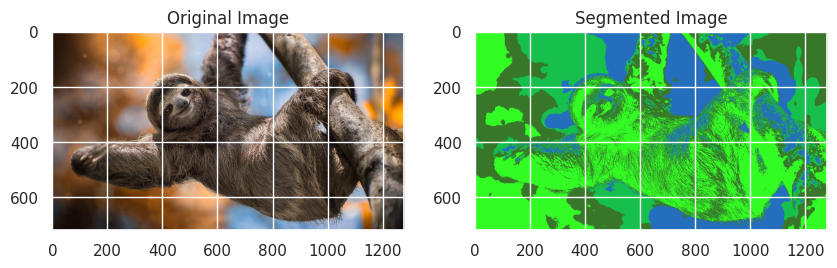

In [ ]:
import urllib.request
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Download the image
url = 'https://raw.githubusercontent.com/plopezmp/AmI/main/images/dormilon.jpg'
#url = 'https://raw.githubusercontent.com/plopezmp/AmI/main/images/tortuga.jpg'
#url = 'https://raw.githubusercontent.com/plopezmp/AmI/main/images/Panda-rojo.jpg'

urllib.request.urlretrieve(url, 'dormilon.jpg')

# Load the image and convert it to RGB mode
img = Image.open('dormilon.jpg').convert('RGB')

# Convert the image to a numpy array
img_array = np.array(img)

# Reshape the array into a 2D array of pixels
pixels = img_array.reshape(-1, 3)

# Cluster the pixels into k clusters
k = 4  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)

# Assign each pixel to its cluster
labels = kmeans.predict(pixels)

# Reshape the labels back into the original image shape
label_img = labels.reshape(img_array.shape[:2])

# Create a new image using the cluster labels as the pixel values
new_img = Image.fromarray(np.uint8(kmeans.cluster_centers_[label_img] * 255))

# Save the new image
new_img.save('segmented.jpg')

# Display the original and segmented images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(new_img)
ax[1].set_title('Segmented Image')
plt.show()


El color the cada cluster depende del valor del centroide tras realizar K-Means.

**Por ejemplo, para ilustrarlo supongamos que tenemos una imagen pequeña con los valores de pixel siguientes:**


$$
\renewcommand{\arraystretch}{1.5}
\begin{bmatrix}
    \begin{bmatrix}
        50 & 80 & 100 \\
        70 & 100 & 120
    \end{bmatrix} \\
    \\
    \begin{bmatrix}
        60 & 90 & 110 \\
        80 & 110 & 130
    \end{bmatrix}
\end{bmatrix}
$$



Queremos hacer K-Means con K=2.Hacemos reshape para tener un array 2D de pixeles

$$
\renewcommand{\arraystretch}{1.5}
\begin{bmatrix}
        50 & 80 & 100 \\
        70 & 100 & 120 \\
        60 & 90 & 110 \\
        80 & 110 & 130
\end{bmatrix}
$$

Aplicamos K-Means con esta imagen, y, por ejemplo, digamos que obtenemos los siguientes centroides:

$$
\renewcommand{\arraystretch}{1.5}
\begin{bmatrix}
        60 & 85 & 105 \\
        75 & 105 & 125
        \end{bmatrix}
$$

El pixel en la posición $(0,0)$ y $(0,1)$ pertenecen al primer centroide porque su valor está más cerca que al segundo centroide. El pixel $(1,0)$ está más cerca del primer centroide que del segundo,  mientras que el pixel $(2,2)$ lo está del segunto centroide. Por tanto, la imagen resultante es:

$$
\renewcommand{\arraystretch}{1.5}
\begin{bmatrix}
    \begin{bmatrix}
        60 & 85 & 105 \\
        60 & 85 & 105
    \end{bmatrix} \\
    \\
    \begin{bmatrix}
        60 & 85 & 105 \\
        75 & 105 & 125
    \end{bmatrix}
\end{bmatrix}
$$